# Data Discovery

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import datetime
import requests
from bs4 import BeautifulSoup

In [24]:
one_dimensional_arr = np.array([1, 2, 3])
two_dimensional_arr = np.array([[1, 2, 3], [4, 5, 6]])
three_dimensional_arr = np.array([[[1, 2, 3, 4], [5, 6, 7, 8]], [[9, 10, 11, 12], [13, 14, 15, 16]], [[17, 18, 19, 20], [21, 22, 23, 24]]])

In [25]:
print(one_dimensional_arr)
print(one_dimensional_arr.shape)
print(one_dimensional_arr.ndim)

[1 2 3]
(3,)
1


In [26]:
print(two_dimensional_arr)
print(two_dimensional_arr.shape)
print(two_dimensional_arr.ndim)

[[1 2 3]
 [4 5 6]]
(2, 3)
2


In [27]:
print(three_dimensional_arr)
print(three_dimensional_arr.shape)
print(three_dimensional_arr.ndim)

[[[ 1  2  3  4]
  [ 5  6  7  8]]

 [[ 9 10 11 12]
  [13 14 15 16]]

 [[17 18 19 20]
  [21 22 23 24]]]
(3, 2, 4)
3


## Get Data

### Listing and Reviews

In [214]:
def parse_html(website):
    """
    Parse html from the given website.
    """
    page = requests.get(website)
    content = page.content
    soup = BeautifulSoup(content, "html.parser")

    return soup


def get_sources(soup):
    """
    Get latest airbnb open data sources scraping from the website.
    """
    sources = list()

    tables = soup.find_all("table")
    for table in tables:
        anchors = table.find_all('a')[:3]
        for anchor in anchors:
            source = anchor["href"]
            sources.append(source)

    return sources

In [219]:
website = "http://insideairbnb.com/get-the-data"
soup = parse_html(website)
sources = get_sources(soup)

In [270]:
pd.read_csv(sources[0])

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20230309202119,2023-03-09,city scrape,Quiet Garden View Room & Super Fast Wi-Fi,Quiet Garden View Room & Super Fast Wi-Fi<br /...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,...,4.98,4.69,4.81,0363 5F3A 5684 6750 D14D,f,1,0,1,0,1.90
1,311124,https://www.airbnb.com/rooms/311124,20230309202119,2023-03-10,city scrape,*historic centre* *bright* *canal view* *jordaan*,> Please be so kind to book ONLY AFTER conta...,Perfect location in the lively centre. All his...,https://a0.muscache.com/pictures/5208672/5bb60...,1600010,...,4.92,4.93,4.60,0363 59D8 7D30 6CFA DC81,f,1,1,0,0,0.66
2,319985,https://www.airbnb.com/rooms/319985,20230309202119,2023-03-10,city scrape,Elegant Appartement Central Location.,"From December 26 thru January 2, minimum stay ...",Bij aankomst vertel ik mijn gasten graag over ...,https://a0.muscache.com/pictures/3b76222e-ed0a...,1640702,...,4.78,4.85,4.62,0363 7D88 E1E8 F521 9A10,f,2,1,1,0,3.73
3,327285,https://www.airbnb.com/rooms/327285,20230309202119,2023-03-10,city scrape,beautiful designed ap.+bikes+garden,Cosy and comfortable apartment on the ground f...,'De Pijp' as we Amsterdammers know it today is...,https://a0.muscache.com/pictures/4283713/63eaa...,1672823,...,4.99,4.91,4.84,0363 8A88 B129 62B5 BD4E,t,2,0,2,0,4.19
4,331946,https://www.airbnb.com/rooms/331946,20230309202119,2023-03-10,previous scrape,Lovely FAMILY house near Vondelpark,* Our house is only suitable for a couple or f...,NaN,https://a0.muscache.com/pictures/b73c16af-4e31...,1687595,...,4.88,4.79,4.75,0363 A942 21DC C431 1AD1,f,1,1,0,0,0.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6993,842462220391708128,https://www.airbnb.com/rooms/842462220391708128,20230309202119,2023-03-10,city scrape,Flat in the center of Amsterdam,Our place is the really best place you can pic...,"Stay in the middle of Amsterdam. Bikes around,...",https://a0.muscache.com/pictures/miso/Hosting-...,47205615,...,NaN,NaN,NaN,0363 80A2 E913 8FAD A98A,f,1,1,0,0,NaN
6994,842493348876281257,https://www.airbnb.com/rooms/842493348876281257,20230309202119,2023-03-09,city scrape,3bed ark close to city centre,"At NDSM, the arty heart of the city, you can f...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,454835217,...,NaN,NaN,NaN,0363 B755 6BD8 6F8D AA7F,t,1,1,0,0,NaN
6995,842634905680862660,https://www.airbnb.com/rooms/842634905680862660,20230309202119,2023-03-10,city scrape,ground floor studio 46m2 at boulevard & canal,Studio in a newly build house. Entrance at the...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,504448710,...,NaN,NaN,NaN,0363 76A0 B46B 281A C38E,f,1,1,0,0,NaN
6996,842713539293550316,https://www.airbnb.com/rooms/842713539293550316,20230309202119,2023-03-09,city scrape,Oasis in trendy Amsterdam East,"Design appartement met fijne tuin, in een van ...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,17537276,...,NaN,NaN,NaN,0363 97C2 71FF 5383 DC95,f,1,1,0,0,NaN


In [271]:
sources[1]

'http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2023-03-09/data/calendar.csv.gz'

In [ ]:
pd.read_csv(sources[1])

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2818,2023-03-09,f,$69.00,$69.00,3.0,1125.0
1,2818,2023-03-10,f,$69.00,$69.00,3.0,1125.0
2,2818,2023-03-11,f,$69.00,$69.00,3.0,1125.0
3,2818,2023-03-12,f,$69.00,$69.00,3.0,1125.0
4,2818,2023-03-13,t,$69.00,$69.00,3.0,1125.0
...,...,...,...,...,...,...,...
2554273,308028,2024-03-04,f,$100.00,$100.00,3.0,10.0
2554274,308028,2024-03-05,f,$100.00,$100.00,3.0,10.0
2554275,308028,2024-03-06,f,$100.00,$100.00,3.0,10.0
2554276,308028,2024-03-07,f,$100.00,$100.00,3.0,10.0


In [236]:
pd.read_csv(sources[2])

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2818,1191,2009-03-30,10952,Lam,Daniel is really cool. The place was nice and ...
1,2818,1771,2009-04-24,12798,Alice,Daniel is the most amazing host! His place is ...
2,2818,1989,2009-05-03,11869,Natalja,We had such a great time in Amsterdam. Daniel ...
3,2818,2797,2009-05-18,14064,Enrique,Very professional operation. Room is very clea...
4,2818,3151,2009-05-25,17977,Sherwin,Daniel is highly recommended. He provided all...
...,...,...,...,...,...,...
339800,824786788735749611,835318762323369349,2023-02-26,290348379,גילי,חי
339801,824786788735749611,839773065929401349,2023-03-04,213259429,Valentin,"apparement très agréable et pratique d’accès,l..."
339802,805134076304782677,825276775983528050,2023-02-12,13859126,Andrea,"Lo recomiendo 100 %, Joao es amable, esta siem..."
339803,805134076304782677,830269188278850889,2023-02-19,16782777,Orit,Wonderful apartment very close to the centre o...


In [243]:
df = pd.read_csv(sources[6])

In [260]:
df = pd.read_csv(sources[9])

In [266]:
sources[9]

'http://data.insideairbnb.com/greece/attica/athens/2022-12-27/data/listings.csv.gz'

In [268]:
df[["scrape_id", "last_scraped", "source", "availability_30"]]

,scrape_id,last_scraped,source,availability_30
0,20221227164102,2022-12-27,previous scrape,0
1,20221227164102,2022-12-28,city scrape,0
2,20221227164102,2022-12-28,city scrape,21
3,20221227164102,2022-12-28,city scrape,19
4,20221227164102,2022-12-27,city scrape,10
...,...,...,...,...
11051,20221227164102,2022-12-28,city scrape,30
11052,20221227164102,2022-12-27,city scrape,24
11053,20221227164102,2022-12-27,city scrape,25
11054,20221227164102,2022-12-28,city scrape,24


In [262]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [244]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [240]:
sources[7]

'http://data.insideairbnb.com/united-states/nc/asheville/2023-03-19/data/calendar.csv.gz'

In [86]:
location_elements = soup.find_all("h3")
locations = [location_element.text.lower() for location_element in location_elements]

In [67]:
def to_date_str(date_text, date_format="%Y-%m-%d"):
    """
    Transform the given scraping date to the specified format.
    """
    date_texts = date_text.split(' ')
    year = int(date_texts[2])
    month = int(datetime.datetime.strptime(date_texts[1][:-1], '%B').month)
    day = int(date_texts[0])

    date_str = datetime.date(year, month, day).strftime(date_format)

    return date_str


latest_date_elements = soup.find_all("h4")
latest_dates = [to_date_str(lastest_date_element.contents[0].text) for lastest_date_element in latest_date_elements]

In [111]:
for location in locations:
    print(location)

amsterdam, north holland, the netherlands
antwerp, flemish region, belgium
asheville, north carolina, united states
athens, attica, greece
austin, texas, united states
bangkok, central thailand, thailand
barcelona, catalonia, spain
barossa valley, south australia, australia
barwon south west, vic, victoria, australia
beijing, beijing, china
belize, belize, belize
bergamo, lombardia, italy
berlin, berlin, germany
bologna, emilia-romagna, italy
bordeaux, nouvelle-aquitaine, france
boston, massachusetts, united states
bozeman, montana, united states
bristol, england, united kingdom
broward county, florida, united states
brussels, brussels, belgium
buenos aires, ciudad autónoma de buenos aires, argentina
cambridge, massachusetts, united states
cape town, western cape, south africa
chicago, illinois, united states
clark county, nv, nevada, united states
columbus, ohio, united states
copenhagen, hovedstaden, denmark
crete, crete, greece
dallas, texas, united states
denver, colorado, united s

In [135]:
n = dict()

for location in locations:
    location_elements = tuple(location.split(', '))
    n_locations = len(location_elements)

    n[location_elements] = n_locations
    # if n_locations == 1:
    #     pass
    # elif n_locations == 2:
    #     pass
    # elif n_locations == 3:
    #     pass

In [140]:
dict(sorted(n.items(), key=lambda item: item[1]))

{('ireland',): 1,
 ('malta',): 1,
 ('new zealand',): 1,
 ('amsterdam', 'north holland', 'the netherlands'): 3,
 ('antwerp', 'flemish region', 'belgium'): 3,
 ('asheville', 'north carolina', 'united states'): 3,
 ('athens', 'attica', 'greece'): 3,
 ('austin', 'texas', 'united states'): 3,
 ('bangkok', 'central thailand', 'thailand'): 3,
 ('barcelona', 'catalonia', 'spain'): 3,
 ('barossa valley', 'south australia', 'australia'): 3,
 ('beijing', 'beijing', 'china'): 3,
 ('belize', 'belize', 'belize'): 3,
 ('bergamo', 'lombardia', 'italy'): 3,
 ('berlin', 'berlin', 'germany'): 3,
 ('bologna', 'emilia-romagna', 'italy'): 3,
 ('bordeaux', 'nouvelle-aquitaine', 'france'): 3,
 ('boston', 'massachusetts', 'united states'): 3,
 ('bozeman', 'montana', 'united states'): 3,
 ('bristol', 'england', 'united kingdom'): 3,
 ('broward county', 'florida', 'united states'): 3,
 ('brussels', 'brussels', 'belgium'): 3,
 ('buenos aires', 'ciudad autónoma de buenos aires', 'argentina'): 3,
 ('cambridge', 'ma

In [133]:
sorted(n)

[1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4]

In [120]:
# data = [location.count(', ') for location in locations]
countries = [location.split(', ')[-1].lstrip().replace(' ', '-') for location in locations]

In [121]:
countries

['the-netherlands',
 'belgium',
 'united-states',
 'greece',
 'united-states',
 'thailand',
 'spain',
 'australia',
 'australia',
 'china',
 'belize',
 'italy',
 'germany',
 'italy',
 'france',
 'united-states',
 'united-states',
 'united-kingdom',
 'united-states',
 'belgium',
 'argentina',
 'united-states',
 'south-africa',
 'united-states',
 'united-states',
 'united-states',
 'denmark',
 'greece',
 'united-states',
 'united-states',
 'ireland',
 'united-kingdom',
 'spain',
 'italy',
 'united-states',
 'switzerland',
 'belgium',
 'spain',
 'united-kingdom',
 'united-states',
 'china',
 'turkey',
 'united-states',
 'portugal',
 'united-kingdom',
 'united-states',
 'france',
 'spain',
 'spain',
 'spain',
 'australia',
 'spain',
 'mexico',
 'australia',
 'italy',
 'canada',
 'australia',
 'germany',
 'italy',
 'united-states',
 'canada',
 'united-states',
 'united-states',
 'united-states',
 'australia',
 'united-states',
 'norway',
 'united-states',
 'france',
 'france',
 'united-stat

In [88]:
for location, latest_date in zip(locations, latest_dates):
    # print(location, latest_date)
    source = f"http://data.insideairbnb.com/"

In [ ]:
listing_dfs = list()

for 

In [9]:
pd.read_csv("http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2023-03-09/data/reviews.csv.gz")

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2818,1191,2009-03-30,10952,Lam,Daniel is really cool. The place was nice and ...
1,2818,1771,2009-04-24,12798,Alice,Daniel is the most amazing host! His place is ...
2,2818,1989,2009-05-03,11869,Natalja,We had such a great time in Amsterdam. Daniel ...
3,2818,2797,2009-05-18,14064,Enrique,Very professional operation. Room is very clea...
4,2818,3151,2009-05-25,17977,Sherwin,Daniel is highly recommended. He provided all...
...,...,...,...,...,...,...
339800,824786788735749611,835318762323369349,2023-02-26,290348379,גילי,חי
339801,824786788735749611,839773065929401349,2023-03-04,213259429,Valentin,"apparement très agréable et pratique d’accès,l..."
339802,805134076304782677,825276775983528050,2023-02-12,13859126,Andrea,"Lo recomiendo 100 %, Joao es amable, esta siem..."
339803,805134076304782677,830269188278850889,2023-02-19,16782777,Orit,Wonderful apartment very close to the centre o...


In [8]:
pd.read_csv("http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2023-03-09/data/listings.csv.gz")

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20230309202119,2023-03-09,city scrape,Quiet Garden View Room & Super Fast Wi-Fi,Quiet Garden View Room & Super Fast Wi-Fi<br /...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,...,4.98,4.69,4.81,0363 5F3A 5684 6750 D14D,f,1,0,1,0,1.90
1,311124,https://www.airbnb.com/rooms/311124,20230309202119,2023-03-10,city scrape,*historic centre* *bright* *canal view* *jordaan*,> Please be so kind to book ONLY AFTER conta...,Perfect location in the lively centre. All his...,https://a0.muscache.com/pictures/5208672/5bb60...,1600010,...,4.92,4.93,4.60,0363 59D8 7D30 6CFA DC81,f,1,1,0,0,0.66
2,319985,https://www.airbnb.com/rooms/319985,20230309202119,2023-03-10,city scrape,Elegant Appartement Central Location.,"From December 26 thru January 2, minimum stay ...",Bij aankomst vertel ik mijn gasten graag over ...,https://a0.muscache.com/pictures/3b76222e-ed0a...,1640702,...,4.78,4.85,4.62,0363 7D88 E1E8 F521 9A10,f,2,1,1,0,3.73
3,327285,https://www.airbnb.com/rooms/327285,20230309202119,2023-03-10,city scrape,beautiful designed ap.+bikes+garden,Cosy and comfortable apartment on the ground f...,'De Pijp' as we Amsterdammers know it today is...,https://a0.muscache.com/pictures/4283713/63eaa...,1672823,...,4.99,4.91,4.84,0363 8A88 B129 62B5 BD4E,t,2,0,2,0,4.19
4,331946,https://www.airbnb.com/rooms/331946,20230309202119,2023-03-10,previous scrape,Lovely FAMILY house near Vondelpark,* Our house is only suitable for a couple or f...,NaN,https://a0.muscache.com/pictures/b73c16af-4e31...,1687595,...,4.88,4.79,4.75,0363 A942 21DC C431 1AD1,f,1,1,0,0,0.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6993,842462220391708128,https://www.airbnb.com/rooms/842462220391708128,20230309202119,2023-03-10,city scrape,Flat in the center of Amsterdam,Our place is the really best place you can pic...,"Stay in the middle of Amsterdam. Bikes around,...",https://a0.muscache.com/pictures/miso/Hosting-...,47205615,...,NaN,NaN,NaN,0363 80A2 E913 8FAD A98A,f,1,1,0,0,NaN
6994,842493348876281257,https://www.airbnb.com/rooms/842493348876281257,20230309202119,2023-03-09,city scrape,3bed ark close to city centre,"At NDSM, the arty heart of the city, you can f...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,454835217,...,NaN,NaN,NaN,0363 B755 6BD8 6F8D AA7F,t,1,1,0,0,NaN
6995,842634905680862660,https://www.airbnb.com/rooms/842634905680862660,20230309202119,2023-03-10,city scrape,ground floor studio 46m2 at boulevard & canal,Studio in a newly build house. Entrance at the...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,504448710,...,NaN,NaN,NaN,0363 76A0 B46B 281A C38E,f,1,1,0,0,NaN
6996,842713539293550316,https://www.airbnb.com/rooms/842713539293550316,20230309202119,2023-03-09,city scrape,Oasis in trendy Amsterdam East,"Design appartement met fijne tuin, in een van ...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,17537276,...,NaN,NaN,NaN,0363 97C2 71FF 5383 DC95,f,1,1,0,0,NaN


In [6]:
listing_df = pd.read_csv("../data/examples/listings.csv.gz")
calendar_df = pd.read_csv("../data/examples/calendar.csv.gz")
review_df = pd.read_csv("../data/examples/reviews.csv.gz")

In [7]:
listing_df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,27934,https://www.airbnb.com/rooms/27934,20221228025833,2022-12-28,city scrape,Nice room with superb city view,Our cool and comfortable one bedroom apartment...,It is very center of Bangkok and easy access t...,https://a0.muscache.com/pictures/566374/23157b...,120437,...,4.91,4.66,4.75,NaN,f,2,2,0,0,0.50
1,941865,https://www.airbnb.com/rooms/941865,20221228025833,2022-12-28,city scrape,Suite Room 3 at MetroPoint,<b>The space</b><br />MetroPoint Bangkok Hotel...,NaN,https://a0.muscache.com/pictures/13930311/1a1c...,610315,...,NaN,NaN,NaN,NaN,f,3,0,3,0,NaN
2,27979,https://www.airbnb.com/rooms/27979,20221228025833,2022-12-28,city scrape,"Easy going landlord,easy place","<b>The space</b><br />""The village Condominium...",NaN,https://a0.muscache.com/pictures/106247594/1d6...,120541,...,NaN,NaN,NaN,NaN,f,2,1,1,0,NaN
3,28745,https://www.airbnb.com/rooms/28745,20221228025833,2022-12-28,city scrape,modern-style apartment in Bangkok,A modern-style apartment situated in a cool ne...,Ramkumheang neigbourhood - hip place with food...,https://a0.muscache.com/pictures/160369/92a7ec...,123784,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
4,35780,https://www.airbnb.com/rooms/35780,20221228025833,2022-12-28,city scrape,Spacious one bedroom at The Kris Condo Bldg. 3,Cozy and clean apartment at MRT Sutthisarn sta...,"There is McDonald's, Au bon Pain and Max Value...",https://a0.muscache.com/pictures/89302e4b-b529...,153730,...,4.50,4.50,5.00,NaN,f,1,0,1,0,0.03


In [55]:
listing_df[listing_df["reviews_per_month"] > 10]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
3737,20869092,Beautiful One Bedroom Apartment Near Skytrain,116193397,Suchada,NaN,Phaya Thai,13.773690,100.540790,Entire home/apt,1571,3,1224,2022-12-16,19.13,1,310,109,NaN
6586,31077175,FREE PICK UP⭐BKK AIRPORT/BREAKFAST/PRIVATE DELUXE,158545122,Pailin,NaN,Lat Krabang,13.721320,100.764950,Private room,1032,1,807,2022-12-12,16.62,3,348,146,NaN
11732,51673745,Siamese Sukhumvit 87-1BR Duplex near BTS On Nut,417308207,Siamese Sukhumvit 87,NaN,Phra Khanong,13.701551,100.603775,Private room,3461,1,263,2022-12-14,18.31,1,364,246,NaN
12895,619882755395668035,7min airport/free pickup/steps to malls/pool&gym,35068115,Shirley,NaN,Lat Krabang,13.720327,100.733743,Entire home/apt,1122,1,60,2022-12-25,11.04,2,129,60,NaN
13177,656164225695350804,1 Bedroom Suite [Silom-Sathorn],340150263,Bandara,NaN,Bang Rak,13.725810,100.538228,Private room,3571,1,101,2022-12-14,17.41,18,304,101,NaN
14153,720807428519292542,Lovely Condo/Asok/SukhumvitBTS/ Free pool&gym!...,480415786,Aaron,NaN,Khlong Toei,13.735460,100.558780,Entire home/apt,1863,1,39,2022-12-23,12.72,9,362,39,NaN
14847,754907399713834456,2BR-BTS Ekamai-100inch projector-Infinity Pool...,106371215,Kk,NaN,Khlong Toei,13.717870,100.584070,Entire home/apt,3676,1,21,2022-12-22,12.60,4,323,21,NaN
14894,755714540112573205,2BR-BTS Ekamai 300m-Sky Infinity Pool&Gym-tub,106371215,Kk,NaN,Khlong Toei,13.715660,100.583810,Entire home/apt,4102,1,17,2022-12-25,10.85,4,346,17,NaN
15228,770846996579268639,1BR- BTS Ekamai 300m-Sky infinity Pool&Gym,106371215,Kk,NaN,Khlong Toei,13.716772,100.584955,Entire home/apt,2668,1,16,2022-12-26,16.00,4,154,16,NaN


<AxesSubplot: >

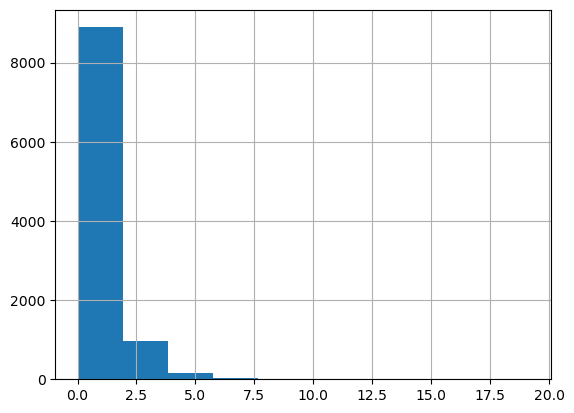

In [52]:
listing_df["reviews_per_month"].hist()

In [46]:
calendar_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,27934,2022-12-28,f,"$1,905.00","$1,905.00",3,90
1,27934,2022-12-29,f,"$1,905.00","$1,905.00",3,90
2,27934,2022-12-30,f,"$1,905.00","$1,905.00",3,90
3,27934,2022-12-31,f,"$1,905.00","$1,905.00",3,90
4,27934,2023-01-01,f,"$1,905.00","$1,905.00",3,90


In [48]:
calendar_df

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,27934,2022-12-28,f,"$1,905.00","$1,905.00",3,90
1,27934,2022-12-29,f,"$1,905.00","$1,905.00",3,90
2,27934,2022-12-30,f,"$1,905.00","$1,905.00",3,90
3,27934,2022-12-31,f,"$1,905.00","$1,905.00",3,90
4,27934,2023-01-01,f,"$1,905.00","$1,905.00",3,90
...,...,...,...,...,...,...,...
5786340,941803,2023-12-23,t,"$1,905.00","$1,905.00",1,365
5786341,941803,2023-12-24,t,"$1,905.00","$1,905.00",1,365
5786342,941803,2023-12-25,t,"$1,905.00","$1,905.00",1,365
5786343,941803,2023-12-26,t,"$1,905.00","$1,905.00",1,365


5715

In [42]:
review_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,27934,1094339,2012-04-07,1368195,Michael,We stayed in the apartment for a week and we e...
1,27934,1241042,2012-05-07,2007324,Scott,My girlfriend and I recently stayed in Nuttee'...
2,27934,1523384,2012-06-20,2263352,Marc,I stayed for one month at the condo and was re...
3,27934,1655571,2012-07-08,558987,Leyla,Nuttee was a great host! I really enjoyed her ...
4,27934,1972192,2012-08-13,2359865,Rachel,Nuttee was an amazing host. She and her daught...


In [28]:
listing_df.groupby("host_id")["host_name"].count()

host_id
58920        2
70413        3
108793       4
120437       2
120541       2
            ..
492361460    1
492463555    1
492465329    1
492470428    1
492665929    1
Name: host_name, Length: 6659, dtype: int64

In [29]:
listing_df[listing_df["host_id"] == 58920]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
30,156583,Studio near Chula University/Silom walk to MRT...,58920,Gael,NaN,Bang Rak,13.72850,100.52313,Entire home/apt,1176,7,63,2022-11-25,0.47,2,95,2,NaN
35,166267,1Bed apt. near Chula University/Silom,58920,Gael,NaN,Bang Rak,13.72733,100.52555,Entire home/apt,1843,7,71,2022-11-30,0.54,2,156,5,NaN
